# Download e tratamento das variaveis


## Definindo os ativos para download

In [25]:
import pandas as pd
import yfinance as yf

pd.set_option('display.float_format', '{:.8f}'.format)

ativos = {
    'BTC-USD',
    'ETH-USD',
    'XRP-USD',
    'SOL-USD',
    'BNB-USD',
    '^IXIC',      # NASDAQ
    '^NYA',       # NYSE COMPOSITE (DJ)
    '^BVSP',      # IBOVESPA (Brasil)
    '000001.SS',  # SSE Composite Index (China)
    '^HSI',       # HANG SENG INDEX (China)
    '399001.SZ',  # Shenzhen Index (China)
    '^N100',      # Euronext (100 ativos da bolsa mais capitalizadas)
    'LSEG.L',     # FTSE 100 (100 principais London Stock)
    'DAX',        # DAX Germany ETF (Alemanha) em EUR
    '^N225',      # Nikkei 225 (Japão)
    '^BSESN',     # S&P BSE SENSEX (India)
    'FTSEMIB.MI', # FTSE MIB Index
    'JPYUSD=X',
    'EURUSD=X',
    'GBPUSD=X',
    'CNYUSD=X',
    'BRLUSD=X',
    'INRUSD=X'
}

## Download de todos os ativos

In [26]:
df_all = yf.download(ativos, period="1d", start='2016-10-13', end='2025-05-01')

[*********************100%***********************]  23 of 23 completed


## Isolando os valores de fechamento, adicionando finais de semana e renomeando colunas


In [27]:
df_close = df_all.Close.reset_index()

df_close = df_close.rename(columns={
      'BTC-USD'     : 'BTC_USD',
      'ETH-USD'     : 'ETH_USD',
      'XRP-USD'     : 'XRP_USD',
      'SOL-USD'     : 'SOL_USD',
      'BNB-USD'     : 'BNB_USD',
      '^IXIC'       : 'NASDAQ_EUA',
      '^NYA'        : 'NYSE_EUA',
      '^BVSP'       : 'Ibovespa_BR',
      '000001.SS'   : 'Shanghai_SSE_China',
      '^HSI'        : 'HangSeng_China',
      '399001.SZ'   : 'Shenzhen_China',
      '^N100'       : 'Euronext_Europa',
      'LSEG.L'      : 'LondonStock_ReinoUnido',
      'DAX'         : 'DAX_Alemanha',
      '^N225'       : 'Nikkei_Japao',
      '^BSESN'      : 'Bombaim_India',
      'FTSEMIB.MI'  : 'Milao_Italia',
      'JPYUSD=X'    : 'JPY_USD',
      'EURUSD=X'    : 'EUR_USD',
      'GBPUSD=X'    : 'GBP_USD',
      'CNYUSD=X'    : 'CNY_USD',
      'BRLUSD=X'    : 'BRL_USD',
      'INRUSD=X'    : 'INR_USD',
    }
)

df_close['Date'] = df_close['Date'].dt.strftime('%Y-%m-%d')
df_base = df_close
df_base

Ticker,Date,Shanghai_SSE_China,Shenzhen_China,BNB_USD,BRL_USD,BTC_USD,CNY_USD,DAX_Alemanha,ETH_USD,EUR_USD,...,LondonStock_ReinoUnido,SOL_USD,XRP_USD,Bombaim_India,Ibovespa_BR,HangSeng_China,NASDAQ_EUA,Euronext_Europa,Nikkei_Japao,NYSE_EUA
0,2016-10-13,3061.34594727,10787.37011719,NaN,0.31243166,636.78601074,0.14883611,19.65354347,NaN,1.10118818,...,2816.64941406,NaN,NaN,27643.10937500,61119.00000000,23031.30078125,5213.33007812,871.38000488,16774.24023438,10522.94042969
1,2016-10-14,3063.80908203,10759.55957031,NaN,0.31473264,640.37799072,0.14860387,19.81470680,NaN,1.10497236,...,2832.59130859,NaN,NaN,27673.59960938,61767.00000000,23233.31054688,5214.16015625,884.54998779,16856.36914062,10521.29980469
2,2016-10-15,NaN,NaN,NaN,NaN,638.64599609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-10-16,NaN,NaN,NaN,NaN,641.63098145,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-10-17,3041.16601562,10651.38085938,NaN,0.31230482,639.19299316,0.14856634,19.66966057,NaN,1.09677994,...,2801.70507812,NaN,NaN,27529.97070312,62696.00000000,23037.53906250,5199.81982422,880.15002441,16900.11914062,10492.86035156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,2025-04-26,NaN,NaN,607.70410156,NaN,94646.92968750,NaN,NaN,1821.88110352,NaN,...,NaN,149.28936768,2.19318891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3118,2025-04-27,NaN,NaN,603.61846924,NaN,93754.84375000,NaN,NaN,1792.86499023,NaN,...,NaN,148.24583435,2.25623703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,2025-04-28,3288.41503906,9855.20019531,606.36499023,0.17591077,94978.75000000,0.13724199,41.36000061,1798.85180664,1.13431418,...,11355.00000000,147.80993652,2.29513788,80218.36718750,135016.00000000,21971.96093750,17366.13085938,1504.98999023,35839.98828125,18971.73046875
3120,2025-04-29,3286.65502930,9849.79980469,601.02899170,0.17690034,94284.78906250,0.13709898,41.54999924,1799.17565918,1.14091432,...,11405.00000000,146.42787170,2.24080110,80288.38281250,135093.00000000,22008.10937500,17461.32031250,1510.47998047,NaN,19089.21093750


## Adicionando dias corridos na base


In [28]:
todos_dias = pd.date_range(start='2016-10-13', end='2025-03-31')
todos_dias = pd.DataFrame(todos_dias)
todos_dias.columns = ['Date']
todos_dias['Date'] = todos_dias['Date'].dt.strftime('%Y-%m-%d')
todos_dias

df_base = pd.merge(todos_dias, df_base, on='Date', how='outer')
df_base

,Date,Shanghai_SSE_China,Shenzhen_China,BNB_USD,BRL_USD,BTC_USD,CNY_USD,DAX_Alemanha,ETH_USD,EUR_USD,...,LondonStock_ReinoUnido,SOL_USD,XRP_USD,Bombaim_India,Ibovespa_BR,HangSeng_China,NASDAQ_EUA,Euronext_Europa,Nikkei_Japao,NYSE_EUA
0,2016-10-13,3061.34594727,10787.37011719,NaN,0.31243166,636.78601074,0.14883611,19.65354347,NaN,1.10118818,...,2816.64941406,NaN,NaN,27643.10937500,61119.00000000,23031.30078125,5213.33007812,871.38000488,16774.24023438,10522.94042969
1,2016-10-14,3063.80908203,10759.55957031,NaN,0.31473264,640.37799072,0.14860387,19.81470680,NaN,1.10497236,...,2832.59130859,NaN,NaN,27673.59960938,61767.00000000,23233.31054688,5214.16015625,884.54998779,16856.36914062,10521.29980469
2,2016-10-15,NaN,NaN,NaN,NaN,638.64599609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-10-16,NaN,NaN,NaN,NaN,641.63098145,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-10-17,3041.16601562,10651.38085938,NaN,0.31230482,639.19299316,0.14856634,19.66966057,NaN,1.09677994,...,2801.70507812,NaN,NaN,27529.97070312,62696.00000000,23037.53906250,5199.81982422,880.15002441,16900.11914062,10492.86035156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,2025-04-26,NaN,NaN,607.70410156,NaN,94646.92968750,NaN,NaN,1821.88110352,NaN,...,NaN,149.28936768,2.19318891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3118,2025-04-27,NaN,NaN,603.61846924,NaN,93754.84375000,NaN,NaN,1792.86499023,NaN,...,NaN,148.24583435,2.25623703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,2025-04-28,3288.41503906,9855.20019531,606.36499023,0.17591077,94978.75000000,0.13724199,41.36000061,1798.85180664,1.13431418,...,11355.00000000,147.80993652,2.29513788,80218.36718750,135016.00000000,21971.96093750,17366.13085938,1504.98999023,35839.98828125,18971.73046875
3120,2025-04-29,3286.65502930,9849.79980469,601.02899170,0.17690034,94284.78906250,0.13709898,41.54999924,1799.17565918,1.14091432,...,11405.00000000,146.42787170,2.24080110,80288.38281250,135093.00000000,22008.10937500,17461.32031250,1510.47998047,NaN,19089.21093750



## Preenchendo os valores NaN da base com a técnica forward fill

In [29]:
# BTC 2016-10-13
# ETH 2017-11-09
# XRP 2017-11-09
# SOL 2020-04-10
# BNB 2017-11-09

df_base.ffill(inplace=True)
df_base

,Date,Shanghai_SSE_China,Shenzhen_China,BNB_USD,BRL_USD,BTC_USD,CNY_USD,DAX_Alemanha,ETH_USD,EUR_USD,...,LondonStock_ReinoUnido,SOL_USD,XRP_USD,Bombaim_India,Ibovespa_BR,HangSeng_China,NASDAQ_EUA,Euronext_Europa,Nikkei_Japao,NYSE_EUA
0,2016-10-13,3061.34594727,10787.37011719,NaN,0.31243166,636.78601074,0.14883611,19.65354347,NaN,1.10118818,...,2816.64941406,NaN,NaN,27643.10937500,61119.00000000,23031.30078125,5213.33007812,871.38000488,16774.24023438,10522.94042969
1,2016-10-14,3063.80908203,10759.55957031,NaN,0.31473264,640.37799072,0.14860387,19.81470680,NaN,1.10497236,...,2832.59130859,NaN,NaN,27673.59960938,61767.00000000,23233.31054688,5214.16015625,884.54998779,16856.36914062,10521.29980469
2,2016-10-15,3063.80908203,10759.55957031,NaN,0.31473264,638.64599609,0.14860387,19.81470680,NaN,1.10497236,...,2832.59130859,NaN,NaN,27673.59960938,61767.00000000,23233.31054688,5214.16015625,884.54998779,16856.36914062,10521.29980469
3,2016-10-16,3063.80908203,10759.55957031,NaN,0.31473264,641.63098145,0.14860387,19.81470680,NaN,1.10497236,...,2832.59130859,NaN,NaN,27673.59960938,61767.00000000,23233.31054688,5214.16015625,884.54998779,16856.36914062,10521.29980469
4,2016-10-17,3041.16601562,10651.38085938,NaN,0.31230482,639.19299316,0.14856634,19.66966057,NaN,1.09677994,...,2801.70507812,NaN,NaN,27529.97070312,62696.00000000,23037.53906250,5199.81982422,880.15002441,16900.11914062,10492.86035156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,2025-04-26,3295.06005859,9917.05957031,607.70410156,0.17609665,94646.92968750,0.13724953,41.18999863,1821.88110352,1.13719070,...,11440.00000000,149.28936768,2.19318891,79212.53125000,134739.00000000,21980.74023438,17382.93945312,1501.18994141,35705.73828125,18899.80078125
3118,2025-04-27,3295.06005859,9917.05957031,603.61846924,0.17609665,93754.84375000,0.13724953,41.18999863,1792.86499023,1.13719070,...,11440.00000000,148.24583435,2.25623703,79212.53125000,134739.00000000,21980.74023438,17382.93945312,1501.18994141,35705.73828125,18899.80078125
3119,2025-04-28,3288.41503906,9855.20019531,606.36499023,0.17591077,94978.75000000,0.13724199,41.36000061,1798.85180664,1.13431418,...,11355.00000000,147.80993652,2.29513788,80218.36718750,135016.00000000,21971.96093750,17366.13085938,1504.98999023,35839.98828125,18971.73046875
3120,2025-04-29,3286.65502930,9849.79980469,601.02899170,0.17690034,94284.78906250,0.13709898,41.54999924,1799.17565918,1.14091432,...,11405.00000000,146.42787170,2.24080110,80288.38281250,135093.00000000,22008.10937500,17461.32031250,1510.47998047,35839.98828125,19089.21093750


In [30]:
df_base.isna().sum()

,0
Date,0
Shanghai_SSE_China,0
Shenzhen_China,0
BNB_USD,392
BRL_USD,0
BTC_USD,0
CNY_USD,0
DAX_Alemanha,0
ETH_USD,392
EUR_USD,0


## Ordenando as colunas

In [32]:
nova_ordem = [
    'Date',
    'BTC_USD',
    'ETH_USD',
    'XRP_USD',
    'SOL_USD',
    'BNB_USD',
    'NASDAQ_EUA',
    'NYSE_EUA',
    'Ibovespa_BR',
    'Euronext_Europa',
    'LondonStock_ReinoUnido',
    'Milao_Italia',
    'DAX_Alemanha',
    'Shanghai_SSE_China',
    'Shenzhen_China',
    'HangSeng_China',
    'Bombaim_India',
    'Nikkei_Japao',
    'BRL_USD',
    'EUR_USD',
    'GBP_USD',
    'CNY_USD',
    'INR_USD',
    'JPY_USD',
]
df_base = df_base[nova_ordem]
df_base

,Date,BTC_USD,ETH_USD,XRP_USD,SOL_USD,BNB_USD,NASDAQ_EUA,NYSE_EUA,Ibovespa_BR,Euronext_Europa,...,Shenzhen_China,HangSeng_China,Bombaim_India,Nikkei_Japao,BRL_USD,EUR_USD,GBP_USD,CNY_USD,INR_USD,JPY_USD
0,2016-10-13,636.78601074,NaN,NaN,NaN,NaN,5213.33007812,10522.94042969,61119.00000000,871.38000488,...,10787.37011719,23031.30078125,27643.10937500,16774.24023438,0.31243166,1.10118818,1.21876907,0.14883611,0.01496600,0.00958736
1,2016-10-14,640.37799072,NaN,NaN,NaN,NaN,5214.16015625,10521.29980469,61767.00000000,884.54998779,...,10759.55957031,23233.31054688,27673.59960938,16856.36914062,0.31473264,1.10497236,1.22219503,0.14860387,0.01497365,0.00964116
2,2016-10-15,638.64599609,NaN,NaN,NaN,NaN,5214.16015625,10521.29980469,61767.00000000,884.54998779,...,10759.55957031,23233.31054688,27673.59960938,16856.36914062,0.31473264,1.10497236,1.22219503,0.14860387,0.01497365,0.00964116
3,2016-10-16,641.63098145,NaN,NaN,NaN,NaN,5214.16015625,10521.29980469,61767.00000000,884.54998779,...,10759.55957031,23233.31054688,27673.59960938,16856.36914062,0.31473264,1.10497236,1.22219503,0.14860387,0.01497365,0.00964116
4,2016-10-17,639.19299316,NaN,NaN,NaN,NaN,5199.81982422,10492.86035156,62696.00000000,880.15002441,...,10651.38085938,23037.53906250,27529.97070312,16900.11914062,0.31230482,1.09677994,1.21832359,0.14856634,0.01499131,0.00961178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,2025-04-26,94646.92968750,1821.88110352,2.19318891,149.28936768,607.70410156,17382.93945312,18899.80078125,134739.00000000,1501.18994141,...,9917.05957031,21980.74023438,79212.53125000,35705.73828125,0.17609665,1.13719070,1.33262265,0.13724953,0.01172920,0.00699893
3118,2025-04-27,93754.84375000,1792.86499023,2.25623703,148.24583435,603.61846924,17382.93945312,18899.80078125,134739.00000000,1501.18994141,...,9917.05957031,21980.74023438,79212.53125000,35705.73828125,0.17609665,1.13719070,1.33262265,0.13724953,0.01172920,0.00699893
3119,2025-04-28,94978.75000000,1798.85180664,2.29513788,147.80993652,606.36499023,17366.13085938,18971.73046875,135016.00000000,1504.98999023,...,9855.20019531,21971.96093750,80218.36718750,35839.98828125,0.17591077,1.13431418,1.32900965,0.13724199,0.01171167,0.00695212
3120,2025-04-29,94284.78906250,1799.17565918,2.24080110,146.42787170,601.02899170,17461.32031250,19089.21093750,135093.00000000,1510.47998047,...,9849.79980469,22008.10937500,80288.38281250,35839.98828125,0.17690034,1.14091432,1.34361649,0.13709898,0.01174256,0.00703344


# Bases consolidadas

## Criando uma função para adicionar Lags e MMs

In [33]:
def criar_colunas_lag_mm(df, lags=[7,14,21,28],mms=[10,20,30]):
  colunas = [
    'NASDAQ_EUA',
    'NYSE_EUA',
    'Ibovespa_BR',
    'Shanghai_SSE_China',
    'HangSeng_China',
    'Shenzhen_China',
    'Euronext_Europa',
    'LondonStock_ReinoUnido',
    'DAX_Alemanha',
    'Nikkei_Japao',
    'Bombaim_India',
    'Milao_Italia',
    'JPY_USD',
    'EUR_USD',
    'GBP_USD',
    'CNY_USD',
    'BRL_USD',
    'INR_USD',
  ]

  for column in colunas:
      for lag in lags:
          df[f'{column}_lag_{lag}'] = df[column].shift(lag)

  for column in colunas:
      for mm in mms:
          df[f'{column}_MM_{mm}'] = df[column].shift(7).rolling(mm).mean()

  return df

## Criando df_lags com 50 e df_lags_mms com lags e mms

In [66]:
x_columns = ['NASDAQ_EUA', 'NYSE_EUA', 'Ibovespa_BR', 'Euronext_Europa',
       'LondonStock_ReinoUnido', 'Milao_Italia', 'DAX_Alemanha',
       'Shanghai_SSE_China', 'Shenzhen_China', 'HangSeng_China',
       'Bombaim_India', 'Nikkei_Japao', 'BRL_USD', 'EUR_USD', 'GBP_USD',
       'CNY_USD', 'INR_USD', 'JPY_USD']
y_columns = ['BTC_USD', 'ETH_USD', 'XRP_USD', 'SOL_USD', 'BNB_USD']
columns_to_remove = x_columns + y_columns

df_lags_mms = df_base.copy()
df_lags_mms = criar_colunas_lag_mm(df_lags_mms)
df_lags_mms = df_lags_mms[(pd.to_datetime(df_lags_mms['Date']) >= '2017-01-01')]
df_lags_mms = df_lags_mms.drop(columns=columns_to_remove)
df_lags_mms = df_lags_mms.iloc[:-30]
df_lags_mms.to_csv('df_lags_mms.csv', index=False, encoding='utf-8')

df_lags = df_base.copy()
df_lags = criar_colunas_lag_mm(df_lags, mms=[], lags=list(range(7, 51)))
df_lags = df_lags[(pd.to_datetime(df_lags['Date']) >= '2017-01-01')]
df_lags = df_lags.iloc[:-30]
df_lags = df_lags.drop(columns=columns_to_remove)

df_lags_mms_abril = df_base.copy()
df_lags_mms_abril = criar_colunas_lag_mm(df_lags_mms_abril)
df_lags_mms_abril = df_lags_mms_abril.iloc[-30:]
df_lags_mms_abril = df_lags_mms_abril.drop(columns=x_columns)
df_lags_mms_abril.to_csv('df_lags_mms_abril.csv', index=False, encoding='utf-8')

df_lags_abril = df_base.copy()
df_lags_abril = criar_colunas_lag_mm(df_lags_abril)
df_lags_abril = df_lags_abril.iloc[-30:]
df_lags_abril = df_lags_abril.drop(columns=x_columns)
df_lags_abril.to_csv('df_lags_abril.csv', index=False, encoding='utf-8')

<ipython-input-33-a66f30059ae1>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_MM_{mm}'] = df[column].shift(7).rolling(mm).mean()
<ipython-input-33-a66f30059ae1>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_MM_{mm}'] = df[column].shift(7).rolling(mm).mean()
<ipython-input-33-a66f30059ae1>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

In [69]:
df_lags_mms_abril.head(50)

,Date,BTC_USD,ETH_USD,XRP_USD,SOL_USD,BNB_USD,NASDAQ_EUA_lag_7,NASDAQ_EUA_lag_14,NASDAQ_EUA_lag_21,NASDAQ_EUA_lag_28,...,GBP_USD_MM_30,CNY_USD_MM_10,CNY_USD_MM_20,CNY_USD_MM_30,BRL_USD_MM_10,BRL_USD_MM_20,BRL_USD_MM_30,INR_USD_MM_10,INR_USD_MM_20,INR_USD_MM_30
3092,2025-04-01,85169.17187500,1905.49145508,2.13961101,126.68238068,611.29711914,18271.85937500,17504.11914062,17436.09960938,18285.16015625,...,1.28446929,0.13810496,0.13805055,0.13788995,0.17529808,0.17405448,0.17316904,0.01157143,0.01152567,0.01150885
3093,2025-04-02,82485.71093750,1795.31323242,2.02506709,117.75762939,590.63757324,17899.01953125,17750.78906250,17648.44921875,18552.73046875,...,1.28544732,0.13806726,0.13804457,0.13788557,0.17560102,0.17411822,0.17320231,0.01158933,0.01153441,0.01151307
3094,2025-04-03,83102.82812500,1815.63720703,2.06246710,117.06145477,592.12445068,17804.02929688,17691.63085938,17303.00976562,18069.25976562,...,1.28631338,0.13802956,0.13803858,0.13787968,0.17562259,0.17416286,0.17324689,0.01160060,0.01154129,0.01151573
3095,2025-04-04,83843.80468750,1815.33520508,2.12895989,122.78688049,597.57940674,17322.99023438,17784.05078125,17754.08984375,18196.22070312,...,1.28723869,0.13797131,0.13802652,0.13786974,0.17543470,0.17419869,0.17324790,0.01161700,0.01155090,0.01152192
3096,2025-04-05,83504.79687500,1805.97326660,2.14373112,120.25899506,593.11486816,17322.99023438,17784.05078125,17754.08984375,18196.22070312,...,1.28813775,0.13790273,0.13801446,0.13786639,0.17522828,0.17423452,0.17331037,0.01162888,0.01156050,0.01152847
3097,2025-04-06,78214.48437500,1576.72802734,1.91789496,105.71201324,554.59490967,17322.99023438,17784.05078125,17754.08984375,18196.22070312,...,1.28931484,0.13783932,0.13798658,0.13788025,0.17494693,0.17430020,0.17340954,0.01163756,0.01156974,0.01153574
3098,2025-04-07,79235.33593750,1555.24096680,1.89775395,106.90277863,554.48339844,17299.28906250,18188.58984375,17808.66015625,17468.32031250,...,1.29044612,0.13781063,0.13798307,0.13789442,0.17468921,0.17444085,0.17348974,0.01164836,0.01158189,0.01154372
3099,2025-04-08,76271.95312500,1472.55310059,1.79456794,105.51219177,553.46740723,17449.89062500,18271.85937500,17504.11914062,17436.09960938,...,1.29151944,0.13779352,0.13798535,0.13791245,0.17461344,0.17460731,0.17363060,0.01166012,0.01159351,0.01155202
3100,2025-04-09,82573.95312500,1668.04003906,2.05173802,119.05754089,582.36932373,17601.05078125,17899.01953125,17750.78906250,17648.44921875,...,1.29258306,0.13775177,0.13795437,0.13792070,0.17459048,0.17478416,0.17382925,0.01166994,0.01160508,0.01156027
3101,2025-04-10,79626.14062500,1522.51879883,1.96648204,112.80392456,577.40594482,16550.60937500,17804.02929688,17691.63085938,17303.00976562,...,1.29373252,0.13771570,0.13792547,0.13793128,0.17479356,0.17498939,0.17417805,0.01167450,0.01161362,0.01156775


In [58]:
tmp_lags_mms = df_lags_mms.copy()
tmp_lags = df_lags.copy()

df_lags_mms = tmp_lags_mms.iloc[:-30]
df_lags_mms_abril = tmp_lags_mms.iloc[-30:]

df_lags = tmp_lags.iloc[:-30]
df_lags_abril = tmp_lags.iloc[-30:]


df_lags.to_csv('df_lags.csv', index=False, encoding='utf-8')

df_lags_mms_abril.to_csv('df_lags_mms_abril.csv', index=False, encoding='utf-8')
df_lags_abril.to_csv('df_lags_abril.csv', index=False, encoding='utf-8')

## Base Todos os Ys desde 2020-04-10

In [54]:
data_inicial = '2020-04-10'
data_final = '2025-03-31'

ys_and_date =  ['Date', 'BTC_USD', 'ETH_USD', 'XRP_USD', 'SOL_USD', 'BNB_USD']

all_y = df_base.copy()
all_y = all_y[ys_and_date]

all_y = all_y[(all_y['Date'] >= data_inicial) & (all_y['Date'] <= data_final)]

all_lags_2020 = df_lags.copy()
all_lags_2020 = pd.merge(all_y, all_lags_2020, on='Date', how='left')
all_lags_2020.to_csv('all_lags_2020.csv', index=False, encoding='utf-8')

all_lags_mms_2020 = df_lags_mms.copy()
all_lags_mms_2020 = pd.merge(all_y, all_lags_mms_2020, on='Date', how='left')
all_lags_mms_2020.to_csv('all_lags_mms_2020.csv', index=False, encoding='utf-8')

## Base Todos os Ys desde 2022-06-01

In [55]:
data_inicial = '2022-06-01'
data_final = '2025-03-31'

ys_and_date =  ['Date', 'BTC_USD', 'ETH_USD', 'XRP_USD', 'SOL_USD', 'BNB_USD']

all_y = df_base.copy()
all_y = all_y[ys_and_date]

all_y = all_y[(all_y['Date'] >= data_inicial) & (all_y['Date'] <= data_final)]

all_lags_2022 = df_lags.copy()
all_lags_2022 = pd.merge(all_y, all_lags_2022, on='Date', how='left')
all_lags_2022.to_csv('all_lags_2022.csv', index=False, encoding='utf-8')

all_lags_mms_2022 = df_lags_mms.copy()
all_lags_mms_2022 = pd.merge(all_y, all_lags_mms_2022, on='Date', how='left')
all_lags_mms_2022.to_csv('all_lags_mms_2022.csv', index=False, encoding='utf-8')

## Bases com o período todo de cada cripto

In [56]:
data_final = '2025-03-31'

# ETH
# XRP 2017-11-09
# SOL 2020-04-10
# BNB 2017-11-09

btc = df_base.copy()
btc = btc[['Date', 'BTC_USD']]
btc = btc[(btc['Date'] >= '2017-01-01') & (btc['Date'] <= data_final)]
btc_lags = pd.merge(btc, df_lags, on='Date', how='left')
btc_lags.to_csv('btc_lags.csv', index=False, encoding='utf-8')
btc_lags_mms = pd.merge(btc, df_lags_mms, on='Date', how='left')
btc_lags_mms.to_csv('btc_lags_mms.csv', index=False, encoding='utf-8')

eth = df_base.copy()
eth = eth[['Date', 'ETH_USD']]
eth = eth[(eth['Date'] >= '2017-11-09') & (eth['Date'] <= data_final)]
eth_lags = pd.merge(eth, df_lags, on='Date', how='left')
eth_lags.to_csv('eth_lags.csv', index=False, encoding='utf-8')
eth_lags_mms = pd.merge(eth, df_lags_mms, on='Date', how='left')
eth_lags_mms.to_csv('eth_lags_mms.csv', index=False, encoding='utf-8')

xrp = df_base.copy()
xrp = xrp[['Date', 'XRP_USD']]
xrp = xrp[(xrp['Date'] >= '2017-11-09') & (xrp['Date'] <= data_final)]
xrp_lags = pd.merge(xrp, df_lags, on='Date', how='left')
xrp_lags.to_csv('xrp_lags.csv', index=False, encoding='utf-8')
xrp_lags_mms = pd.merge(xrp, df_lags_mms, on='Date', how='left')
xrp_lags_mms.to_csv('xrp_lags_mms.csv', index=False, encoding='utf-8')

sol = df_base.copy()
sol = sol[['Date', 'SOL_USD']]
sol = sol[(sol['Date'] >= '2020-04-10') & (sol['Date'] <= data_final)]
sol_lags = pd.merge(sol, df_lags, on='Date', how='left')
sol_lags.to_csv('sol_lags.csv', index=False, encoding='utf-8')
sol_lags_mms = pd.merge(sol, df_lags_mms, on='Date', how='left')
sol_lags_mms.to_csv('sol_lags_mms.csv', index=False, encoding='utf-8')

bnb = df_base.copy()
bnb = bnb[['Date', 'BNB_USD']]
bnb = bnb[(bnb['Date'] >= '2017-11-09') & (bnb['Date'] <= data_final)]
bnb_lags = pd.merge(bnb, df_lags, on='Date', how='left')
bnb_lags.to_csv('bnb_lags.csv', index=False, encoding='utf-8')
bnb_lags_mms = pd.merge(bnb, df_lags_mms, on='Date', how='left')
bnb_lags_mms.to_csv('bnb_lags_mms.csv', index=False, encoding='utf-8')

## Listando quais bases temos

In [57]:
names = [
'df_lags',
'df_lags_mms',
'df_lags_abril',
'df_lags_mms_abril',
'all_lags_2020',
'all_lags_mms_2020',
'all_lags_2022',
'all_lags_mms_2022',
'btc_lags',
'btc_lags_mms',
'eth_lags',
'eth_lags_mms',
'xrp_lags',
'xrp_lags_mms',
'sol_lags',
'sol_lags_mms',
'bnb_lags',
'bnb_lags_mms']

description = [
'Somente nossos X com lags',
'Somente nossos X com alguns lags e MMs',
'Somente nossos X com lags somente de abril de 2025',
'Somente nossos X com alguns lags e MMs somente de abril de 2025',
'Todos os Y e X com lags desde 2020',
'Todos os Y e X com lags e mms desde 2020',
'Todos os Y e X com lags desde 2022 (pós pandemia)',
'Todos os Y e X com lags e mms desde 2022 (pós pandemia)',
'BTC, os X com lags e o máximo de período da moeda',
'BTC, os X com lags e mms e o máximo de período da moeda',
'ETH, os X com lags e o máximo de período da moeda',
'ETH, os X com lags e mms e o máximo de período da moeda',
'XRP, os X com lags e o máximo de período da moeda',
'XRP, os X com lags e mms e o máximo de período da moeda',
'SOL, os X com lags e o máximo de período da moeda',
'SOL, os X com lags e mms e o máximo de período da moeda',
'BNB, os X com lags e o máximo de período da moeda',
'BNB, os X com lags e mms e o máximo de período da moeda',
]

columns = ['Lag7 - Lag50',
'Lag7, Lag14, Lag21, Lag28, MM10, MM20, MM30',
'Lag7 - Lag50',
'Lag7, Lag14, Lag21, Lag28, MM10, MM20, MM30',
'BTC, ETH, XRP, SOL, BNB, Bolsas de Lag7 - Lag50',
'BTC, ETH, XRP, SOL, BNB, BolsaLag7, BolsaLag14, BolsaLag21, BolsaLag28, BolsaMM10, BolsaMM20, BolsaMM30',
'BTC, ETH, XRP, SOL, BNB, Bolsas de Lag7 - Lag50',
'BTC, ETH, XRP, SOL, BNB, BolsaLag7, BolsaLag14, BolsaLag21, BolsaLag28, BolsaMM10, BolsaMM20, BolsaMM30',
'BTC, Bolsas de Lag7 - Lag50',
'BTC, BolsaLag7, BolsaLag14, BolsaLag21, BolsaLag28, BolsaMM10, BolsaMM20, BolsaMM30',
'ETH, Bolsas de Lag7 - Lag50',
'ETH, BolsaLag7, BolsaLag14, BolsaLag21, BolsaLag28, BolsaMM10, BolsaMM20, BolsaMM30',
'XRP, Bolsas de Lag7 - Lag50',
'XRP, BolsaLag7, BolsaLag14, BolsaLag21, BolsaLag28, BolsaMM10, BolsaMM20, BolsaMM30',
'SOL, Bolsas de Lag7 - Lag50',
'SOL, BolsaLag7, BolsaLag14, BolsaLag21, BolsaLag28, BolsaMM10, BolsaMM20, BolsaMM30',
'BNB, Bolsas de Lag7 - Lag50',
'BNB, BolsaLag7, BolsaLag14, BolsaLag21, BolsaLag28, BolsaMM10, BolsaMM20, BolsaMM30']

date_min = [
df_lags['Date'].min(),
df_lags_mms['Date'].min(),
df_lags_abril['Date'].min(),
df_lags_mms_abril['Date'].min(),
all_lags_2020['Date'].min(),
all_lags_mms_2020['Date'].min(),
all_lags_2022['Date'].min(),
all_lags_mms_2022['Date'].min(),
btc_lags['Date'].min(),
btc_lags_mms['Date'].min(),
eth_lags['Date'].min(),
eth_lags_mms['Date'].min(),
xrp_lags['Date'].min(),
xrp_lags_mms['Date'].min(),
sol_lags['Date'].min(),
sol_lags_mms['Date'].min(),
bnb_lags['Date'].min(),
bnb_lags_mms['Date'].min()]

date_max = [
df_lags['Date'].max(),
df_lags_mms['Date'].max(),
df_lags_abril['Date'].max(),
df_lags_mms_abril['Date'].max(),
all_lags_2020['Date'].max(),
all_lags_mms_2020['Date'].max(),
all_lags_2022['Date'].max(),
all_lags_mms_2022['Date'].max(),
btc_lags['Date'].max(),
btc_lags_mms['Date'].max(),
eth_lags['Date'].max(),
eth_lags_mms['Date'].max(),
xrp_lags['Date'].max(),
xrp_lags_mms['Date'].max(),
sol_lags['Date'].max(),
sol_lags_mms['Date'].max(),
bnb_lags['Date'].max(),
bnb_lags_mms['Date'].max()]

summary = {
    'Data Frame': names,
    'Descrição': description,
    'Data Inicial': date_min,
    'Data Final': date_max,
    'Colunas': columns
}

summary = pd.DataFrame(summary)
summary.to_csv('summary.csv', index=False, encoding='utf-8')
summary

,Data Frame,Descrição,Data Inicial,Data Final,Colunas
0,df_lags,Somente nossos X com lags,2017-01-01,2025-01-30,Lag7 - Lag50
1,df_lags_mms,Somente nossos X com alguns lags e MMs,2017-01-01,2025-01-30,"Lag7, Lag14, Lag21, Lag28, MM10, MM20, MM30"
2,df_lags_abril,Somente nossos X com lags somente de abril de ...,2025-01-31,2025-03-01,Lag7 - Lag50
3,df_lags_mms_abril,Somente nossos X com alguns lags e MMs somente...,2025-01-31,2025-03-01,"Lag7, Lag14, Lag21, Lag28, MM10, MM20, MM30"
4,all_lags_2020,Todos os Y e X com lags desde 2020,2020-04-10,2025-03-31,"BTC, ETH, XRP, SOL, BNB, Bolsas de Lag7 - Lag50"
5,all_lags_mms_2020,Todos os Y e X com lags e mms desde 2020,2020-04-10,2025-03-31,"BTC, ETH, XRP, SOL, BNB, BolsaLag7, BolsaLag14..."
6,all_lags_2022,Todos os Y e X com lags desde 2022 (pós pandemia),2022-06-01,2025-03-31,"BTC, ETH, XRP, SOL, BNB, Bolsas de Lag7 - Lag50"
7,all_lags_mms_2022,Todos os Y e X com lags e mms desde 2022 (pós ...,2022-06-01,2025-03-31,"BTC, ETH, XRP, SOL, BNB, BolsaLag7, BolsaLag14..."
8,btc_lags,"BTC, os X com lags e o máximo de período da moeda",2017-01-01,2025-03-31,"BTC, Bolsas de Lag7 - Lag50"
9,btc_lags_mms,"BTC, os X com lags e mms e o máximo de período...",2017-01-01,2025-03-31,"BTC, BolsaLag7, BolsaLag14, BolsaLag21, BolsaL..."


# Matrizes de correlação

## Matriz de correlação D0

In [ ]:
ys =  ['BTC_USD', 'ETH_USD', 'XRP_USD', 'SOL_USD', 'BNB_USD']

df_corr = df_base.copy()
# df_corr.drop(columns=ys, inplace=True)

df_corr_sem_data = df_corr.drop('Date', axis=1)
corr_sem_lag = df_corr_sem_data.corr()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


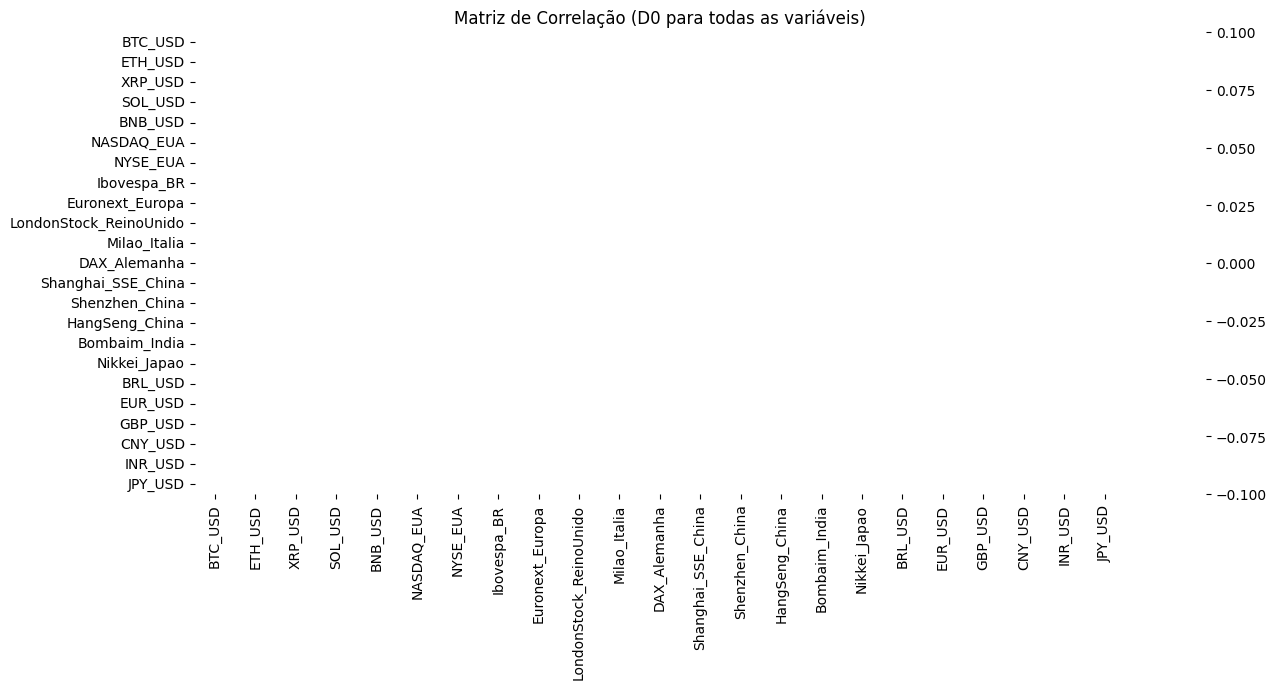

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Criando a máscara para valores entre -0.5 e 0.5
mask = (corr_sem_lag >= -0.5) & (corr_sem_lag <= 0.5)

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(
    corr_sem_lag,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    mask=mask)

# Customizando a cor do texto de acordo com a condição
for i in range(corr_sem_lag.shape[0]):
    for j in range(corr_sem_lag.shape[1]):
        value = corr_sem_lag.iloc[i, j]
        if mask.iloc[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='lightgray', alpha=0.5))
        if -0.5 <= value <= 0.5:
            heatmap.text(j + 0.5, i + 0.5, f'{value:.2f}', color='black', ha='center', va='center', size=10)

plt.title('Matriz de Correlação (D0 para todas as variáveis)')
plt.show()

## Matriz de correlação Lag

In [ ]:
df_corr_lag = df_corr_sem_data.copy()
lag = 50
colunas = [
    'NASDAQ_EUA',
    'NYSE_EUA',
    'Ibovespa_BR',
    'Euronext_Europa',
    'LondonStock_ReinoUnido',
    'Milao_Italia',
    'DAX_Alemanha',
    'Shanghai_SSE_China',
    'Shenzhen_China',
    'HangSeng_China',
    'Bombaim_India',
    'Nikkei_Japao',
    'BRL_USD',
    'EUR_USD',
    'GBP_USD',
    'CNY_USD',
    'INR_USD',
    'JPY_USD'
]

for column in colunas:
        df_corr_lag[f'{column}_lag_{lag}'] = df_corr_lag[column].shift(lag)

df_corr_lag = df_corr_lag.drop(colunas, axis=1)
df_corr_lag = df_corr_lag.loc[lag:]

In [ ]:
corr_lag = df_corr_lag.corr()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


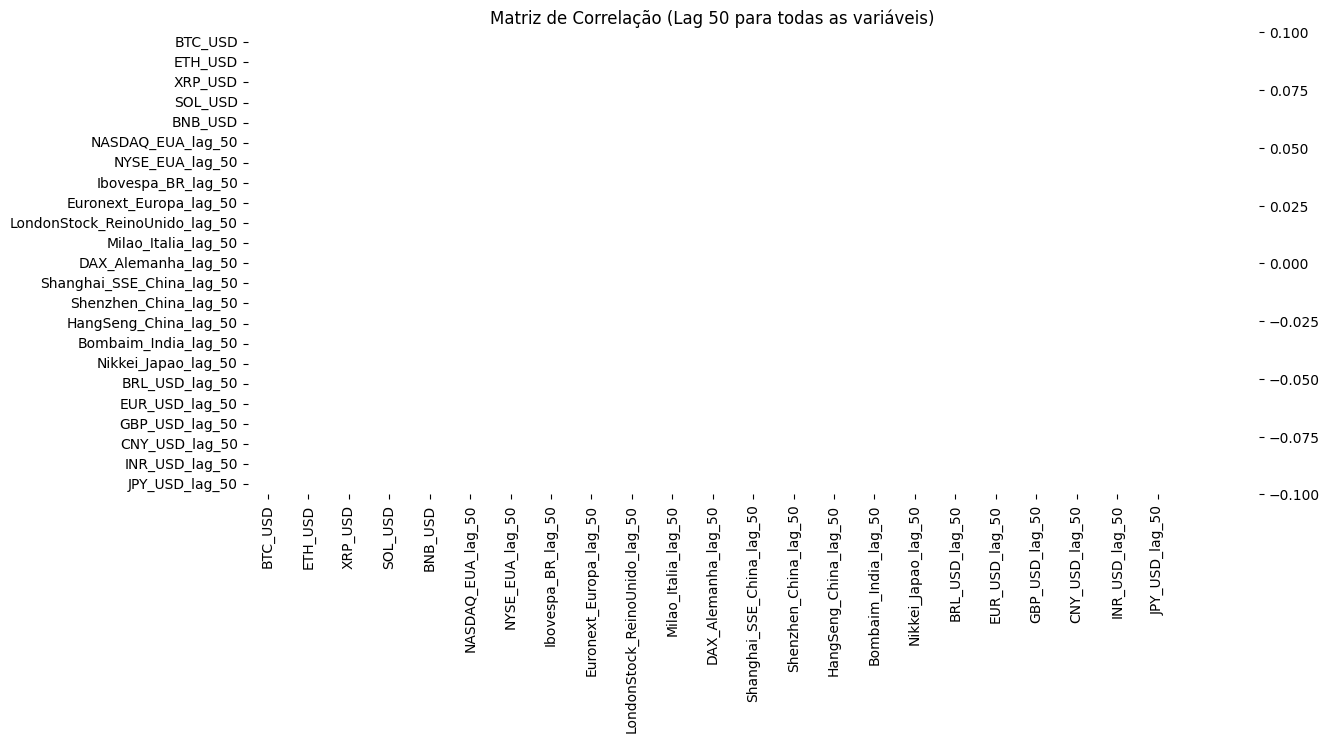

In [ ]:
# Criando a máscara para valores entre -0.5 e 0.5
mask = (corr_lag >= -0.5) & (corr_lag <= 0.5)

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(
    corr_lag,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    mask=mask,
    linecolor='darkgray')

# Customizando a cor do texto de acordo com a condição
for i in range(corr_lag.shape[0]):
    for j in range(corr_lag.shape[1]):
        value = corr_lag.iloc[i, j]
        if mask.iloc[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='lightgray', alpha=0.5))
        if -0.5 <= value <= 0.5:
            heatmap.text(j + 0.5, i + 0.5, f'{value:.2f}', color='black', ha='center', va='center')

plt.title(f'Matriz de Correlação (Lag {lag} para todas as variáveis)')
plt.show()

# Gráfico de dispersão

In [ ]:
df_plot = df_base.copy()
# df_plot = pd.merge(btc, df_plot, on='Date', how='left')
# df_plot = pd.merge(eth, df_plot, on='Date', how='left')
# df_plot = pd.merge(xrp, df_plot, on='Date', how='left')
# df_plot = pd.merge(sol, df_plot, on='Date', how='left')
# df_plot = pd.merge(bnb, df_plot, on='Date', how='left')

In [ ]:
df_plot

,Date,BTC_USD,ETH_USD,XRP_USD,SOL_USD,BNB_USD,NASDAQ_EUA,NYSE_EUA,Ibovespa_BR,Euronext_Europa,...,Shenzhen_China,HangSeng_China,Bombaim_India,Nikkei_Japao,BRL_USD,EUR_USD,GBP_USD,CNY_USD,INR_USD,JPY_USD
0,2016-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,2025-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3088,2025-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3089,2025-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3090,2025-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


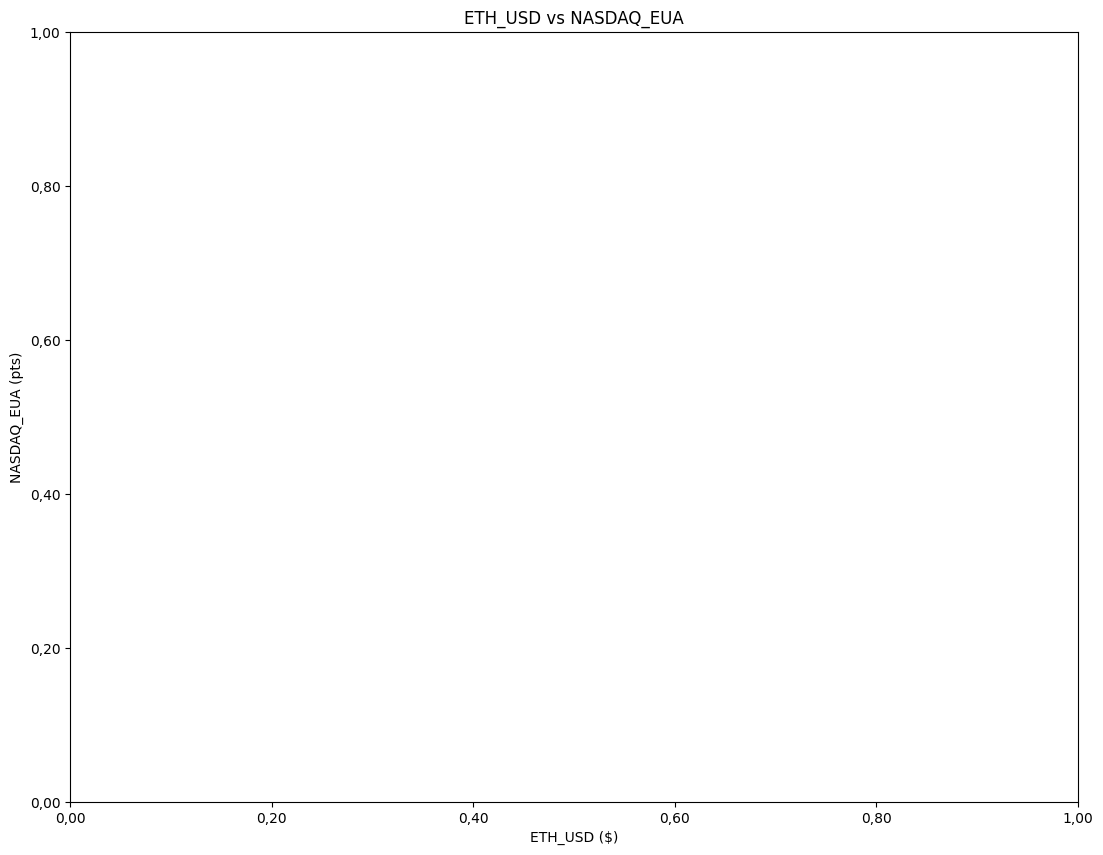

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# var1 = 'BTC_USD'
var1 = 'ETH_USD'
# var1 = 'XRP_USD'
# var1 = 'SOL_USD'
# var1 = 'BNB_USD'

var2 = 'NASDAQ_EUA'

# Criando o gráfico de dispersão
plt.figure(figsize=(13, 10))
sns.scatterplot(
    data=df_plot,
    x=var1,
    y=var2,
    marker='o',
    color='#A02B93',
    edgecolor='None',
    s=12
)

def formatar_moeda(x, pos):
    return f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

formatter = ticker.FuncFormatter(formatar_moeda)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title(f'{var1} vs {var2}')
plt.xlabel(f'{var1} ($)')
plt.ylabel(f'{var2} (pts)')

plt.show()

# Gráfico de linha (não foi usado)


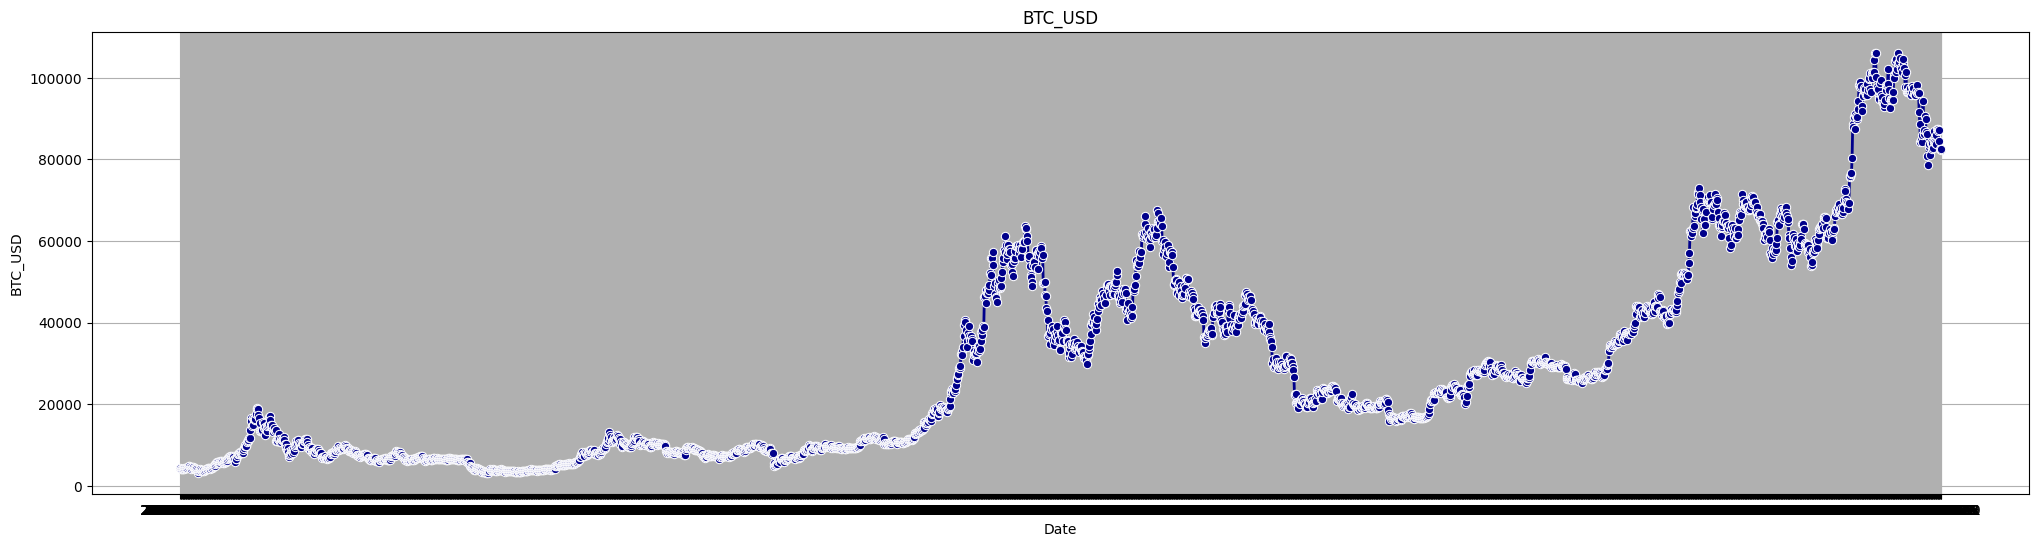

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_linha = df_base.copy()
df_linha = pd.merge(btc, df_linha, on='Date', how='left')
# df_linha = pd.merge(eth, df_linha, on='Date', how='left')
# df_linha = pd.merge(xrp, df_linha, on='Date', how='left')
# df_linha = pd.merge(sol, df_linha, on='Date', how='left')
# df_linha = pd.merge(bnb, df_linha, on='Date', how='left')

varX = 'Date'

# CRIPTO
varY = 'BTC_USD'
# varY = 'ETH_USD'
# varY = 'XRP_USD'
# varY = 'SOL_USD'
# varY = 'BNB_USD'

# BOLSAS
# varY = 'NASDAQ_EUA'
# varY = 'Nikkei_Japao'
# varY = 'Euronext_Europa'
# varY = 'Shenzhen_China'

# MOEDAS
# varY = 'NASDAQ_EUA'
# varY = 'Nikkei_Japao'
# varY = 'Euronext_Europa'
# varY = 'Shenzhen_China'

# Criando o gráfico de linha
plt.figure(figsize=(25, 6))
sns.lineplot(data=df_linha, x=varX, y=varY, marker='o', color='darkblue', linewidth=2)

# Adicionando título e rótulos aos eixos
plt.title(varY)
plt.xlabel(varX)
plt.ylabel(varY)

# Exibindo a grade e o gráfico
plt.grid()
plt.show()

# VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_lags_mms_temp = df_lags_mms.copy()

## VIF Todas as variaveis

In [ ]:
# vif_all = vif_lags_mms_temp.drop(columns=['Date'], inplace=False)
vif_all = vif_lags_mms_temp[[col for col in vif_lags_mms_temp.columns if '7' in col]]
# vif_lags_mms_temp = vif_lags_mms_temp[[
# 'NASDAQ_EUA_lag_7',
# 'Ibovespa_BR_lag_7',
# 'HangSeng_China_lag_7',
# 'LondonStock_ReinoUnido_lag_7',
# 'Nikkei_Japao_lag_7',
# 'Bombaim_India_lag_7',
# 'BRL_USD_lag_7'
# vif_lags_mms_temp = vif_lags_mms_temp[['LondonStock_ReinoUnido_lag_7', 'HangSeng_China_lag_7']]

vif_all_result = pd.DataFrame()
vif_all_result['Variavel'] = vif_all.columns
vif_all_result['VIF'] = [variance_inflation_factor(vif_all.values, i) for i in range(vif_all.shape[1])]
vif_all_result = vif_all_result.sort_values(by='VIF')

vif_all_result

,Variavel,VIF
7,LondonStock_ReinoUnido_lag_7,197.18491277
2,Ibovespa_BR_lag_7,351.41906195
4,HangSeng_China_lag_7,384.81727778
0,NASDAQ_EUA_lag_7,687.28395423
9,Nikkei_Japao_lag_7,823.93294260
16,BRL_USD_lag_7,876.51368449
10,Bombaim_India_lag_7,891.48194890
13,EUR_USD_lag_7,1197.41490229
5,Shenzhen_China_lag_7,1221.06361450
8,DAX_Alemanha_lag_7,1422.18315319


## VIF Somente moedas

In [ ]:
# vif_moeda = vif_lags_mms_temp[[col for col in df_lags_mms.columns if '_USD' in col and '7' in col]]
vif_moeda = vif_lags_mms_temp[[
    'BRL_USD_lag_7',
    'JPY_USD_lag_7'
]]

vif_moeda_result = pd.DataFrame()
vif_moeda_result['Variavel'] = vif_moeda.columns
vif_moeda_result['VIF'] = [variance_inflation_factor(vif_moeda.values, i) for i in range(vif_moeda.shape[1])]
vif_moeda_result = vif_moeda_result.sort_values(by='VIF')

vif_moeda_result

,Variavel,VIF
0,BRL_USD_lag_7,28.15508545
1,JPY_USD_lag_7,28.15508545


In [ ]:
vif_lags_mms = vif_lags_mms.sort_values(by='VIF')
vif_lags_mms

,Variavel,VIF
7,LondonStock_ReinoUnido_lag_7,181.40459021
4,HangSeng_China_lag_7,325.52109918
2,Ibovespa_BR_lag_7,351.85304324
16,BRL_USD_lag_7,491.33503638
0,NASDAQ_EUA_lag_7,688.74171959
10,Bombaim_India_lag_7,719.59500690
9,Nikkei_Japao_lag_7,944.72837157
5,Shenzhen_China_lag_7,1063.44711576
12,JPY_USD_lag_7,1111.52192275
11,Milao_Italia_lag_7,1591.20148551


In [ ]:
vif_lags_mms['VIF'].describe()

,VIF
count,126.00000000
mean,292003.78386771
std,473308.58005680
min,5387.14885760
25%,34942.24748152
50%,115044.76400761
75%,301708.31301261
max,2997778.77751926


# Histogramas

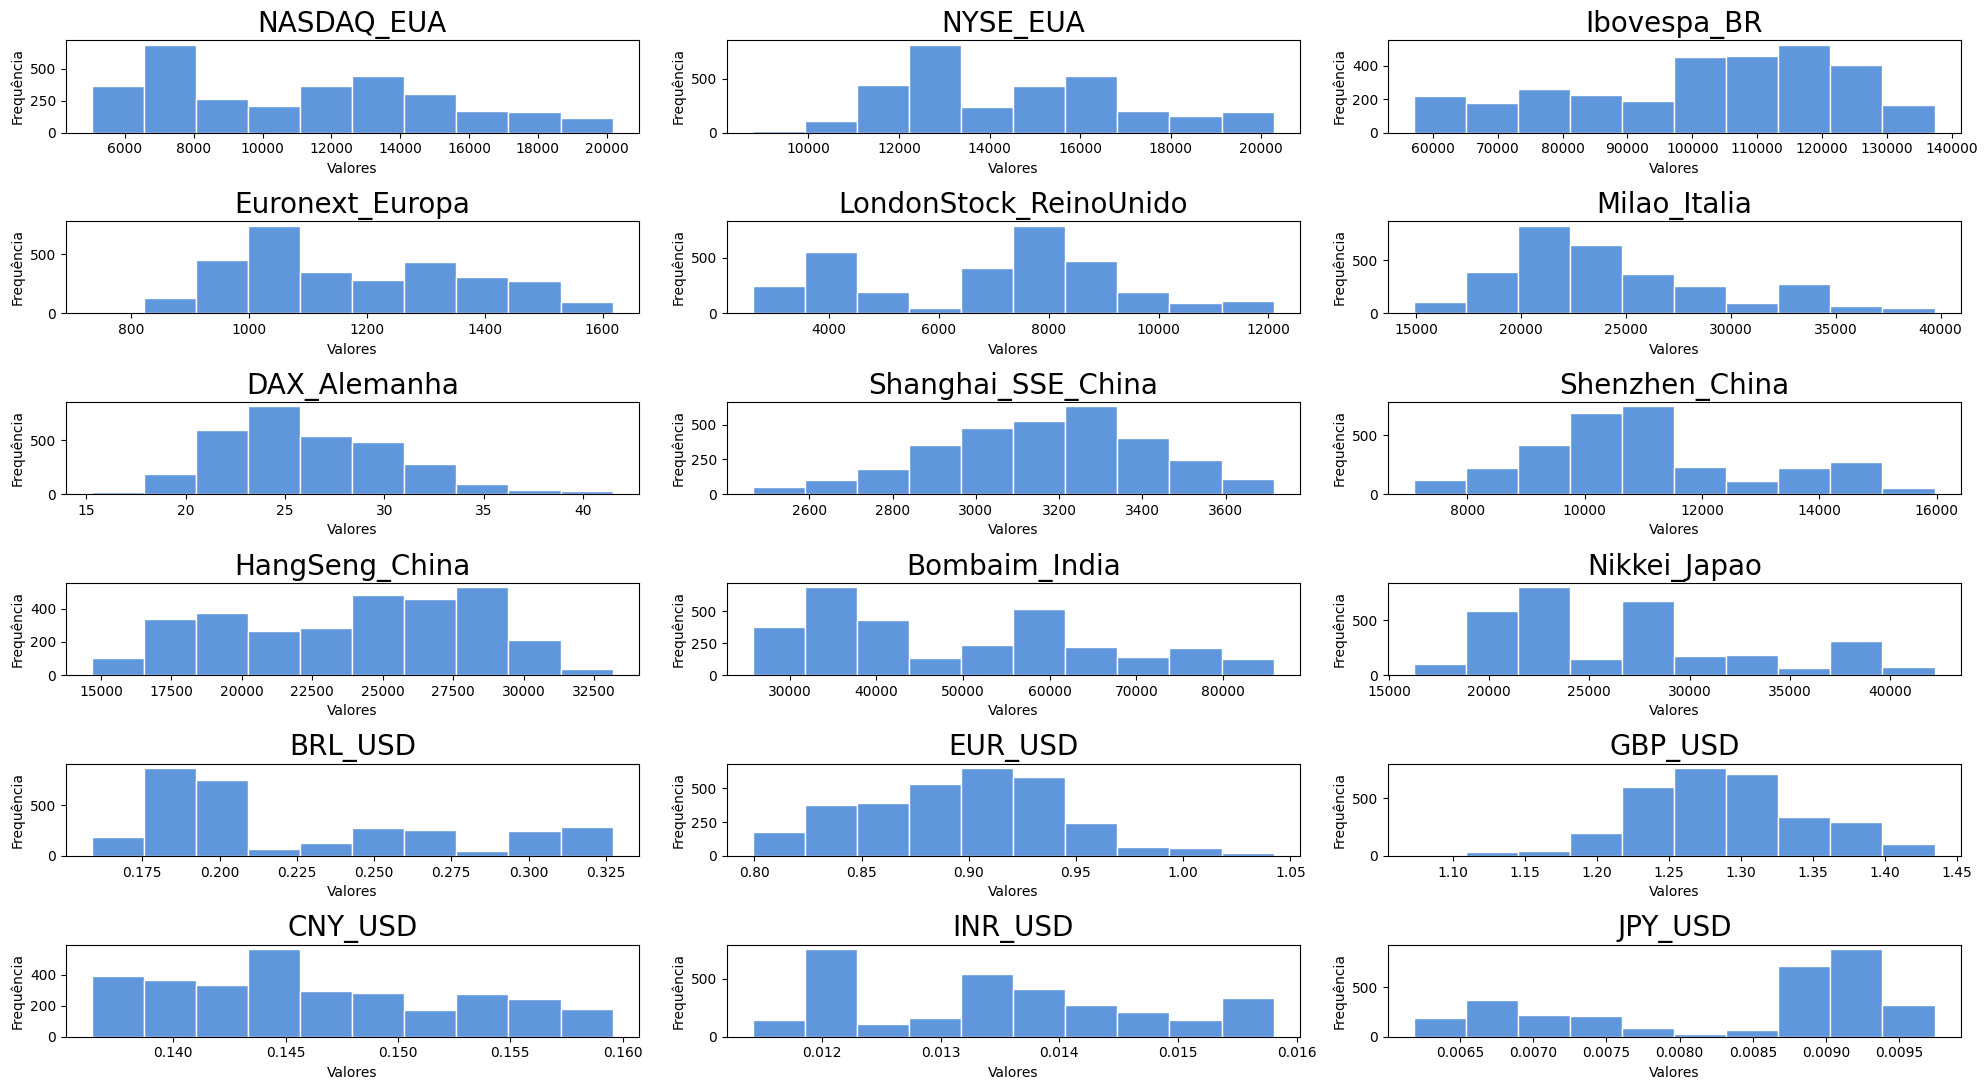

In [ ]:
df_hist_temp = df_base.copy()

df_hist_temp = df_hist_temp.drop(columns=['Date'])

fig, axs = plt.subplots(6, 3, figsize=(20, 11))

for i, col in enumerate(df_hist_temp.columns):
  row = i // 3
  col_position = i % 3

  axs[row,col_position].hist(df_base[col], bins=10, color='#6096dc', edgecolor='white')
  axs[row,col_position].set_title(col, size=20)
  axs[row,col_position].set_xlabel('Valores')
  axs[row,col_position].set_ylabel('Frequência')

# Ajustando layout
plt.tight_layout()

# Exibindo os subplots
plt.show()